In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
# Statistics
from evaluation.classification.statistics import get_precisions
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size
# utils
from evaluation.classification.utils import get_size_list_from_xte
%matplotlib inline
plt.style.use("ggplot")

### --- compare precision with population ---

In [2]:
resnet50_correction = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_correction/validation_matrix.csv')
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')

In [3]:
resnet50_correction = get_precisions(resnet50_correction)
resnet50 = get_precisions(resnet50)

In [4]:
exp_name = ["resnet50_correction", "resnet50"]
exp_ap = [resnet50_correction.mean(), resnet50.mean()]

In [5]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet50_correction,0.880253
1,resnet50,0.877763


In [6]:
df_per_label = pd.DataFrame({"resnet50_correction": resnet50_correction, "resnet50": resnet50})

In [7]:
new_df_per_label = pd.DataFrame()
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[1], index=df_per_label.columns, name='Ephemeridae'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[4], index=df_per_label.columns, name='Plecoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[2], index=df_per_label.columns, name='Ephemeroptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[5], index=df_per_label.columns, name='Trichoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[3], index=df_per_label.columns, name='Lepidoptera'))
new_df_per_label = new_df_per_label.append(pd.Series(df_per_label.values[0], index=df_per_label.columns, name='Diptera'))
new_df_per_label

,resnet50,resnet50_correction
Ephemeridae,0.960784,0.960784
Plecoptera,0.813433,0.843284
Ephemeroptera,0.770000,0.785000
Trichoptera,0.904000,0.868000
Lepidoptera,0.885185,0.888889
Diptera,0.933174,0.935561


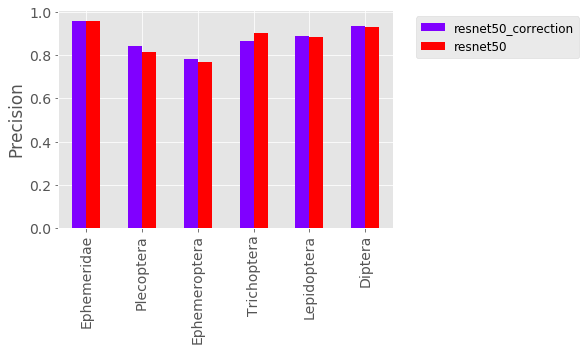

In [9]:
plt.rcParams["font.size"] = 14
new_df_per_label.plot(kind="bar", y=["resnet50_correction", "resnet50"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_correction/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [11]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [12]:
resnet50_correction = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_correction/all_size_df.csv')
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/all_size_df.csv')

In [13]:
resnet50_correction = resnet50_correction.drop(resnet50_correction.index[[0]])
resnet50 = resnet50.drop(resnet50.index[[0]])

In [14]:
insect_size_df

,order,count
0,1.0,1
1,7.0,12
2,8.0,51
3,9.0,127
4,10.0,236
5,11.0,290
6,12.0,310
7,13.0,209
8,14.0,78
9,15.0,10


In [15]:
all_df = resnet50_correction
all_df = all_df.rename(columns={'Accuracy': 'resnet50_correction'})
all_df = all_df.assign(resnet50=resnet50["Accuracy"])
all_df

,Unnamed: 0,order,resnet50_correction,Insect_size,resnet50
1,1,7.0,1.000000,205.833333,1.000000
2,2,8.0,0.882353,395.039216,0.901961
3,3,9.0,0.755906,770.850394,0.716535
4,4,10.0,0.805085,1504.529661,0.805085
5,5,11.0,0.868966,2941.368966,0.875862
6,6,12.0,0.925806,5934.145161,0.938710
7,7,13.0,0.976077,11264.789474,0.956938
8,8,14.0,0.948718,22344.653846,0.961538
9,9,15.0,0.800000,34865.400000,0.900000


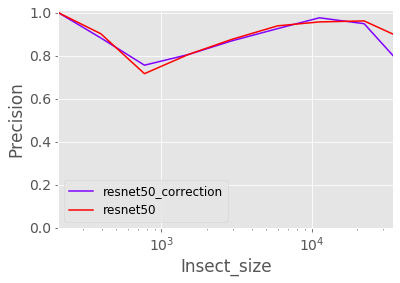

In [16]:
plt.rcParams["font.size"] = 14
all_df.plot(x="Insect_size", y=["resnet50_correction", "resnet50"], logx=True, legend=True, cmap="rainbow")
plt.ylabel("Precision")
plt.legend(fontsize=12)
plt.ylim(0.0, 1.01)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_correction/compare_precision_distrib_of_size.png", bbox_inches="tight")